# TrainingCamp - Cars Prediction

# Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Cars.csv')

In [4]:
df.sample(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
911,Tata Zest Quadrajet 1.3 75PS XE,2017,280000,80000,Diesel,Individual,Manual,First Owner,22.95 kmpl,1248 CC,74 bhp,190Nm@ 1750-3000rpm,5.0
2608,Hyundai Verna 1.6 CRDi EX MT,2013,445000,87185,Diesel,Individual,Manual,Second Owner,22.32 kmpl,1582 CC,126.3 bhp,259.9Nm@ 1900-2750rpm,5.0
6929,Tata Indigo CS LS (TDI) BS III,2009,160000,70000,Diesel,Individual,Manual,First Owner,19.09 kmpl,1396 CC,69 bhp,135Nm@ 2500rpm,5.0
5463,Volkswagen Vento Konekt Diesel Highline,2014,575000,90000,Diesel,Individual,Manual,First Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0
6513,Mahindra KUV 100 D75 K8,2020,550000,60000,Diesel,Individual,Manual,First Owner,25.32 kmpl,1198 CC,77 bhp,190Nm@ 1750-2250rpm,6.0
2556,Mahindra XUV500 W4,2014,649000,117000,Diesel,Individual,Manual,Third Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
2361,Renault KWID RXT,2015,300000,10000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
6519,Maruti Alto LX,2004,90000,60000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [9]:
df.describe(include = "object").T

,count,unique,top,freq
name,8128,2058,Maruti Swift Dzire VDI,129
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289
mileage,7907,393,18.9 kmpl,225
engine,7907,121,1248 CC,1017
max_power,7913,322,74 bhp,377
torque,7906,441,190Nm@ 2000rpm,530


In [10]:
df.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


#### fuel

In [11]:
df.fuel

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8128, dtype: object

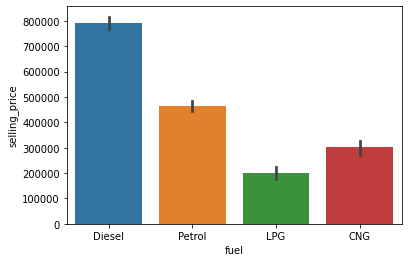

In [12]:
sns.barplot(x = 'fuel', y = 'selling_price', data=df);

*We observe that the mean selling price of Diesel is somewhat higher than other types of fuel*

In [13]:
z = lambda x: 0 if x == 'Diesel' else(1 if x == 'Petrol' else (2 if x == 'CNG' else 3))
df.fuel = df.fuel.apply(z)

In [14]:
df.fuel.value_counts()

0    4402
1    3631
2      57
3      38
Name: fuel, dtype: int64

#### seller type

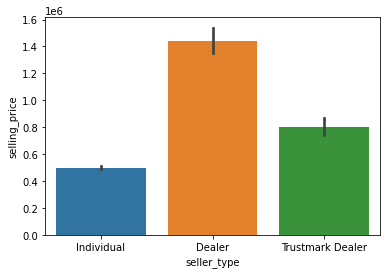

In [15]:
sns.barplot(x = 'seller_type', y = 'selling_price', data=df);

*We observe that the mean selling price of Dealers is somewhat higher than other types of fuel*

In [16]:
z = lambda x: 0 if x == 'Individual' else(1 if x == 'Dealer' else 2)
df.seller_type = df.seller_type.apply(z)

In [17]:
df.seller_type.value_counts()

0    6766
1    1126
2     236
Name: seller_type, dtype: int64

#### transmission

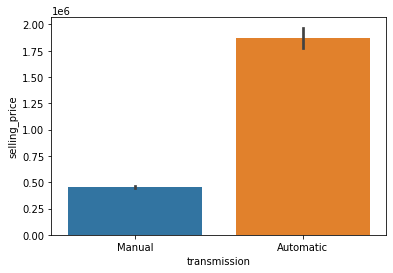

In [18]:
sns.barplot(x = 'transmission', y = 'selling_price', data=df);

*We observe that the mean selling price of Automatic is somewhat higher than other types of fuel*

In [19]:
z = lambda x: 0 if x == 'Manual' else 1
df.transmission = df.transmission.apply(z)

In [20]:
df.transmission.value_counts()

0    7078
1    1050
Name: transmission, dtype: int64

#### owner

In [21]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [22]:
z = lambda x: 0 if x == 'Test Drive Car' else(1 if x == 'First Owner' else (2 if x == 'Second Owner' else (3 if x == 'Third Owner' else 4)))
df.owner = df.owner.apply(z)

In [23]:
df.owner.value_counts()

1    5289
2    2105
3     555
4     174
0       5
Name: owner, dtype: int64

#### mileage

In [24]:
df['mileage'] = (df['mileage'].replace({'km/kg':'*1.34680','kmpl':'*1'}, regex=True)
                                            .dropna()
                                            .apply(pd.eval))

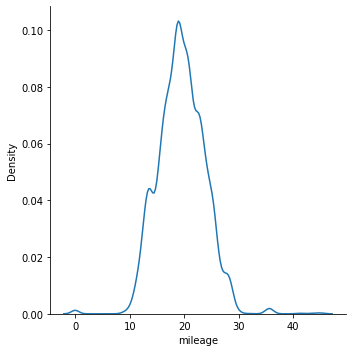

In [25]:
sns.displot(df, x="mileage", kind="kde")

#### engine

In [26]:
df.engine = df.engine.str.replace(' CC', "")
df.engine

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: object

In [27]:
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

#### max power

In [28]:
df.max_power = df.max_power.str.replace(' bhp', "")
df.max_power

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [29]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [30]:
df.max_power

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

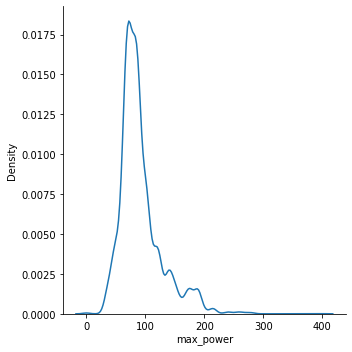

In [31]:
sns.displot(df, x="max_power", kind="kde")

#### seats

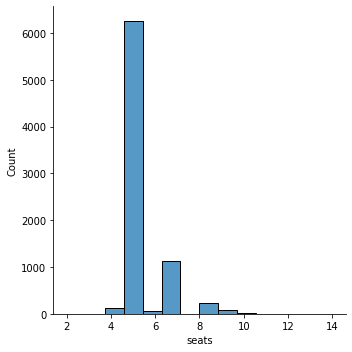

In [32]:
sns.displot(df, x="seats")

In [33]:
df.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [34]:
df.seats.fillna(0.0).astype(int)

0       5
1       5
2       5
3       5
4       5
       ..
8123    5
8124    5
8125    5
8126    5
8127    5
Name: seats, Length: 8128, dtype: int32

#### torque

In [35]:
df['torque'] = df['torque'].str.replace(r"\(.*\)","") 
df['torque'] = df['torque'].str.replace('@', ' ')

C:\Users\AT\AppData\Local\Temp/ipykernel_8812/6085689.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['torque'] = df['torque'].str.replace(r"\(.*\)","")


In [36]:
df['torque'] = df['torque'].str.split(' ').str[0]

In [37]:
df['torque'].value_counts()

200Nm      693
190Nm      604
90Nm       406
113Nm      259
114Nm      246
          ... 
340Nm        1
23.6         1
35.7         1
6            1
436.4Nm      1
Name: torque, Length: 278, dtype: int64

In [38]:
df['torque'] = (df['torque'].replace({'Nm':'/9.80665', 'NM':'/9.80665','kgm':'*1', 'nm':'/9.80665'}, regex=True)
                                            .dropna()
                                            .apply(pd.eval))

#### marque

In [39]:
from sklearn import preprocessing

In [40]:
le = preprocessing.LabelEncoder()

In [41]:
df["marque"] = df.name.str.split(' ').str[0]

In [42]:
df.marque

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: marque, Length: 8128, dtype: object

In [43]:
le = preprocessing.LabelEncoder()

In [44]:
le.fit(df.marque)

LabelEncoder()

In [45]:
df["marque"] = le.transform(df.marque)

In [46]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,marque
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,1,23.40000,1248.0,74.00,19.374608,5.0,20
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,2,21.14000,1498.0,103.52,25.492905,5.0,27
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,3,17.70000,1497.0,78.00,12.700000,5.0,10
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,1,23.00000,1396.0,90.00,22.400000,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,1,16.10000,1298.0,88.20,11.500000,5.0,20
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,1,0,0,1,20.14000,1197.0,81.86,11.599272,5.0,11
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,3,0,0,1,23.29964,1061.0,57.50,7.800000,5.0,20
7,Maruti 800 DX BSII,2001,45000,5000,1,0,0,2,16.10000,796.0,37.00,6.016326,4.0,20
8,Toyota Etios VXD,2011,350000,90000,0,0,0,1,23.59000,1364.0,67.10,17.335176,5.0,29
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,0,0,0,1,20.00000,1399.0,68.10,16.315459,5.0,9


### Missing values

In [47]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
marque             0
dtype: int64

In [48]:
m = df.mileage.mean()
df.mileage.fillna(m, inplace=True)

In [49]:
m = df.torque.mean()
df.torque.fillna(m, inplace=True)

In [50]:
m = df.max_power.mean()
df.max_power.fillna(m, inplace=True)

In [51]:
m = df.engine.mode()[0]
df.engine.fillna(m, inplace=True)
df.engine.astype(int)

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: int32

In [52]:
m = df.seats.mode()[0]
df.seats.fillna(m, inplace=True)
df.engine.astype(int)

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: int32

In [53]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
marque           0
dtype: int64

In [54]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,marque
year,1.000000,0.414092,-0.418006,-0.063381,0.234741,0.244707,-0.513541,0.297289,0.035851,0.213282,-0.059899,0.010222,-0.031469
selling_price,0.414092,1.000000,-0.225534,-0.205453,0.323047,0.588845,-0.243316,-0.129438,0.458345,0.744958,0.191744,0.047135,-0.090271
km_driven,-0.418006,-0.225534,1.000000,-0.240273,-0.194966,-0.201229,0.288681,-0.163723,0.198911,-0.037714,0.135252,0.219860,0.102903
fuel,-0.063381,-0.205453,-0.240273,1.000000,0.034963,0.011879,-0.002501,0.026334,-0.485761,-0.300979,-0.312858,-0.335884,-0.116394
seller_type,0.234741,0.323047,-0.194966,0.034963,1.000000,0.355598,-0.208762,-0.029483,0.121836,0.236716,0.008570,-0.071926,-0.019863
transmission,0.244707,0.588845,-0.201229,0.011879,0.355598,1.000000,-0.150908,-0.178511,0.283986,0.538186,0.124291,-0.069070,-0.052466
owner,-0.513541,-0.243316,0.288681,-0.002501,-0.208762,-0.150908,1.000000,-0.159909,-0.003687,-0.109619,0.039568,0.019900,0.007527
mileage,0.297289,-0.129438,-0.163723,0.026334,-0.029483,-0.178511,-0.159909,1.000000,-0.568068,-0.376783,-0.252456,-0.442248,-0.057762
engine,0.035851,0.458345,0.198911,-0.485761,0.121836,0.283986,-0.003687,-0.568068,1.000000,0.701298,0.434485,0.612220,0.119904
max_power,0.213282,0.744958,-0.037714,-0.300979,0.236716,0.538186,-0.109619,-0.376783,0.701298,1.000000,0.293041,0.191785,-0.067880


In [55]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,marque
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,1,23.40000,1248.0,74.00,19.374608,5.0,20
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,2,21.14000,1498.0,103.52,25.492905,5.0,27
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,3,17.70000,1497.0,78.00,12.700000,5.0,10
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,1,23.00000,1396.0,90.00,22.400000,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,1,16.10000,1298.0,88.20,11.500000,5.0,20
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,1,0,0,1,20.14000,1197.0,81.86,11.599272,5.0,11
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,3,0,0,1,23.29964,1061.0,57.50,7.800000,5.0,20
7,Maruti 800 DX BSII,2001,45000,5000,1,0,0,2,16.10000,796.0,37.00,6.016326,4.0,20
8,Toyota Etios VXD,2011,350000,90000,0,0,0,1,23.59000,1364.0,67.10,17.335176,5.0,29
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,0,0,0,1,20.00000,1399.0,68.10,16.315459,5.0,9


# Trying Different Machine Learning Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score

In [107]:
(Y, X) = (df['selling_price'].values, df.drop(['selling_price', 'name', 'marque', 'seats'], axis = 1))
Y = Y.reshape((X.shape[0], 1))

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size = 0.2)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(6502, 10)
Y_train shape:(6502, 1)
X_test shape:(1626, 10)
Y_test shape:(1626, 1)


### Linear Regression

In [108]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

# train and test scores
lr_train_score = round(lireg.score(X_train, Y_train), 2)
lr_test_score = round(lireg.score(X_test, Y_test), 2)
# predicted output
Y_pred_lr = lireg.predict(X_test)

print('Linear Regression train score: ', lr_train_score)
print('Linear Regression test score: ', lr_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_lr))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_lr))

Linear Regression train score:  0.67
Linear Regression test score:  0.67
Mean absolute error:  275295.1869115048
Coefficient of determination:  0.6695425369071236


### Decision Tree Regressor

In [109]:
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, Y_train)

# train and test scores
dt_train_score = round(dtreg.score(X_train, Y_train), 2)
dt_test_score = round(dtreg.score(X_test, Y_test), 2)
# predicted output
Y_pred_dt = dtreg.predict(X_test)


print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_dt))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_dt))

Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  0.94
Mean absolute error:  85498.20670463199
Coefficient of determination:  0.9440803827723175


In [110]:
from sklearn.ensemble import AdaBoostRegressor
dtreg = AdaBoostRegressor(DecisionTreeRegressor())
dtreg.fit(X_train, Y_train)

# train and test scores
dt_train_score = round(dtreg.score(X_train, Y_train), 2)
dt_test_score = round(dtreg.score(X_test, Y_test), 2)
# predicted output
Y_pred_dt = dtreg.predict(X_test)


print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_dt))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_dt))

C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  0.97
Mean absolute error:  69063.02742318659
Coefficient of determination:  0.9666121466403274


### Random Forests

In [111]:
rfreg1 = RandomForestRegressor(n_estimators=100)
rfreg1.fit(X_train, Y_train)

# train and test scores
rf_train_score = round(rfreg1.score(X_train, Y_train), 2)
rf_test_score = round(rfreg1.score(X_test, Y_test), 2)
# predicted output
Y_pred_rf = rfreg1.predict(X_test)

print('Decision Tree Regressor train score: ', rf_train_score)
print('Decision Tree Regressor test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_rf))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_rf))

C:\Users\AT\AppData\Local\Temp/ipykernel_8812/3541550211.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg1.fit(X_train, Y_train)


Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  0.97
Mean absolute error:  70312.32764612837
Coefficient of determination:  0.9677505422408061


In [130]:
from sklearn.ensemble import AdaBoostRegressor
dtregb = AdaBoostRegressor(RandomForestRegressor())
dtregb.fit(X_train, Y_train)

# train and test scores
dt_train_score = round(dtreg.score(X_train, Y_train), 2)
dt_test_score = round(dtreg.score(X_test, Y_test), 2)
# predicted output
Y_pred_dt = dtregb.predict(X_test)


print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_dt))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_dt))

C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  0.97
Mean absolute error:  72857.59976105543
Coefficient of determination:  0.9704663425202725


## Prediction

In [113]:
# X = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',  'engine', 'max_power', 'torque']
# max_power en kmgp
# torque en kmpl

def preprocess_entry(X):
    # fuel
    if X[2] == 'Diesel':
        X[2] = 0
    elif X[2] == 'Petrol':
        X[2] = 1
    elif X[2] == 'CNG':
        X[2] = 2
    else:
        X[2] = 3
        
    # seller_type
    if X[3] == 'Individual':
        X[3] = 0
    elif X[3] == 'Dealer':
        X[3] = 1
    else:
        X[3] = 2
        
    # transmission
    if X[4] == 'Manual':
        X[4] = 0
    else:
        X[4] = 1 
    

    # owner
    if X[5] == 'Test Drive Car':
        X[5] = 0
    elif X[5] == 'First Owner':
        X[5] = 1 
    elif X[5] == 'Second Owner':
        X[5] = 2
    elif X[5] == 'Third Owner':
        X[5] = 3
    else:
        X[5] = 4 
        
    return X

In [114]:
X = [2012, 100000, 'Diesel', 'Dealer', 'Manual', 'Third Owner', 1995, 74, 40, 145]

In [131]:
Y = dtregb.predict(np.array(preprocess_entry(X)).reshape(1, -1))
Y

C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([463406.65666667])

In [116]:
Y_train

array([[ 300000],
       [ 620000],
       [ 225000],
       ...,
       [2100000],
       [  50000],
       [ 550000]], dtype=int64)

In [117]:
import joblib

In [132]:
joblib.dump(dtregb , 'model_jlib.pkl')

['model_jlib.pkl']

In [133]:
model = joblib.load('model_jlib.pkl')

In [134]:
model.predict(np.array(preprocess_entry(X)).reshape(1, -1))

C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\AT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([463406.65666667])

In [135]:
X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
2579,2011,300000,3,0,0,1,35.28616,998.0,58.20,7.851815
5127,2017,61000,0,0,0,1,26.59000,1248.0,74.00,19.374608
6276,2014,35000,1,0,0,1,21.10000,814.0,55.20,7.596886
4268,2017,56290,0,1,0,1,24.00000,1186.0,73.97,19.399081
1203,2014,120000,0,0,0,1,15.96000,2523.0,62.10,19.884466
...,...,...,...,...,...,...,...,...,...,...
1669,2016,50000,0,0,1,2,26.59000,1248.0,74.00,19.374608
3206,2019,5000,1,0,0,1,18.60000,1197.0,81.86,11.930680
4030,2016,40000,1,0,1,1,10.75000,2694.0,163.70,24.983047
5681,2000,180000,1,0,0,4,17.30000,993.0,60.00,7.953786
